In [8]:
import pandas as pd
import numpy as np

# Charger les données
df = pd.read_csv('C:/Users/hp/Downloads/M2 data scale/Spécialité/projet/archive/CO2 Emissions_Canada.csv')

# Aperçu des données
print(df.head())  # Afficher les 5 premières lignes
print(df.info())  # Résume les colonnes, types de données, et valeurs manquantes


    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                   

C:\Users\hp\AppData\Local\Temp\ipykernel_11992\1944043299.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
#Le nombre de valeurs manquantes par colonnes:
print(df.isnull().sum())

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


### Nos hypothèses :
* La taille du moteur (Engine Size(L)) est positivement corrélée avec les émissions de CO2.
* La consommation de carburant combinée (Fuel Consumption Comb (L/100 km)) est positivement corrélée avec les émissions de CO2.
* Les véhicules diesel (Fuel Type = D) émettent moins de CO2 que ceux fonctionnant à l’essence (Fuel Type = Z).
* La transmission influence significativement les émissions de CO2.

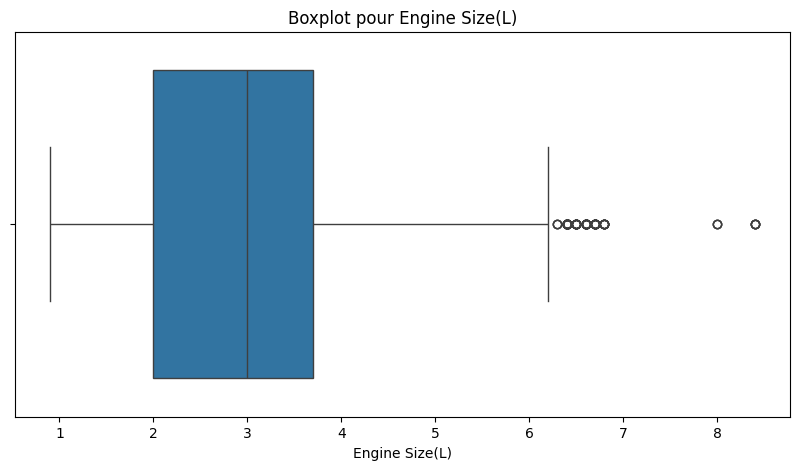

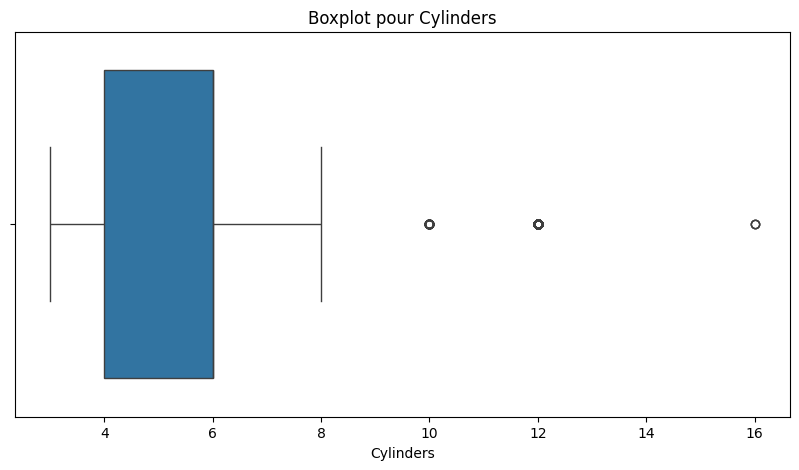

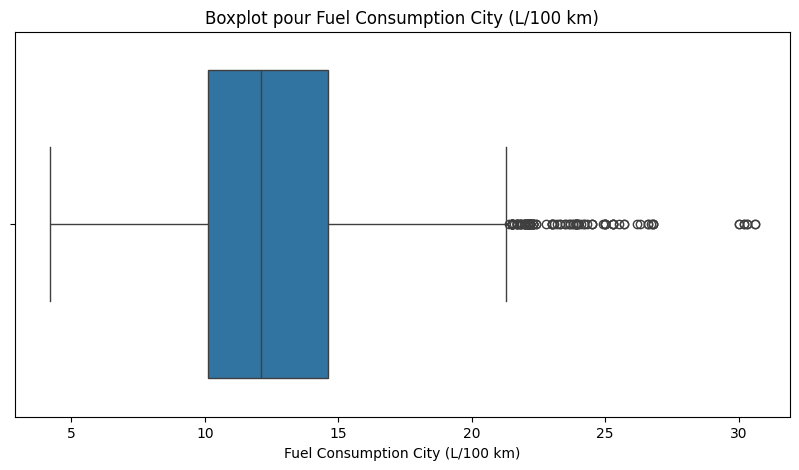

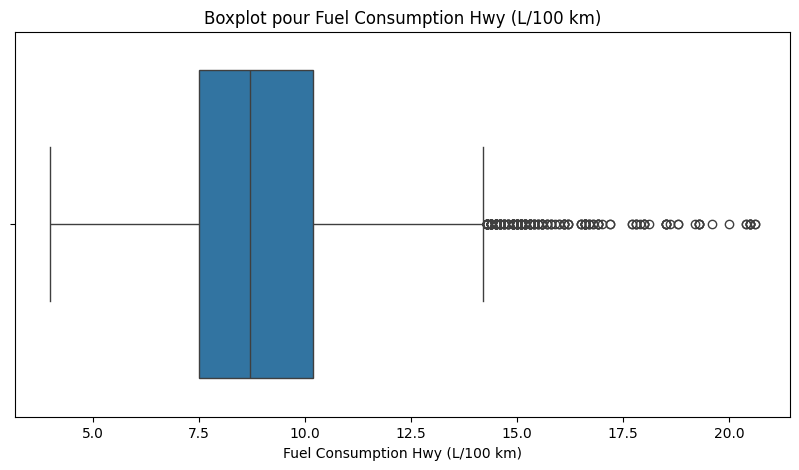

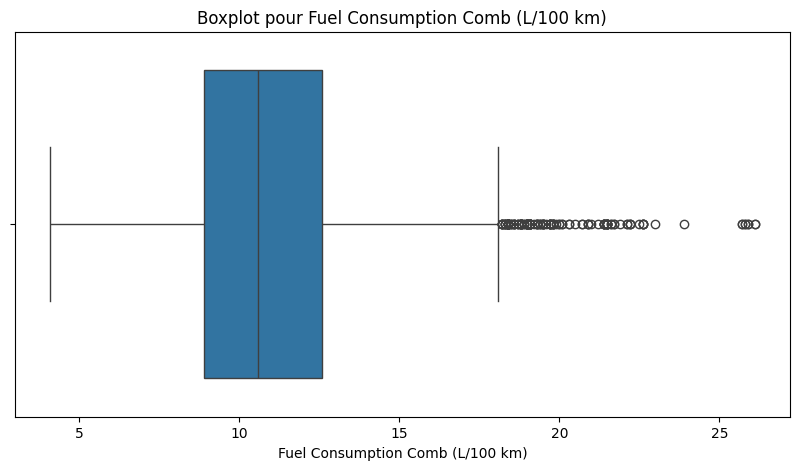

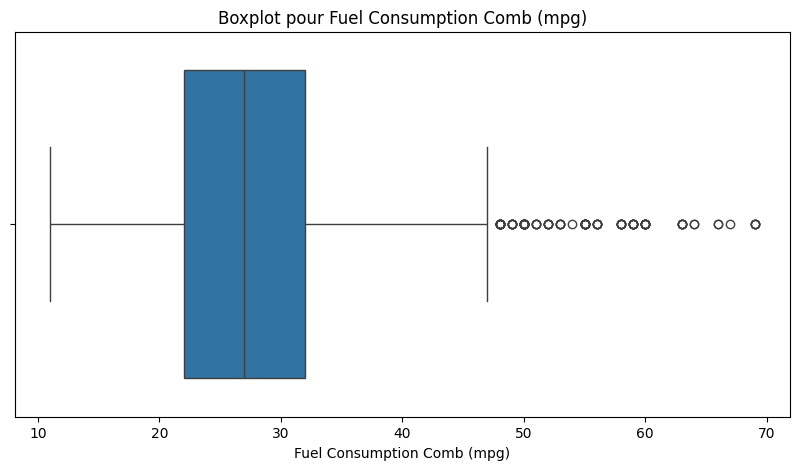

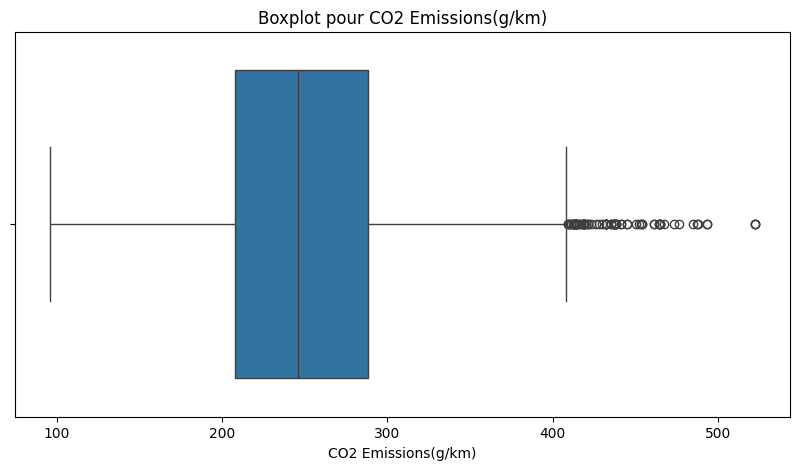

In [ ]:
#Détection des valeurs aberrantes 
import seaborn as sns
import matplotlib.pyplot as plt

# Liste des colonnes numériques
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Tracer des boxplots pour toutes les colonnes numériques
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot pour {col}")
    plt.show()


In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Appliquer la suppression des valeurs aberrantes à chaque colonne numérique
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df = remove_outliers(df, column)




Dimensions du dataset après suppression des valeurs aberrantes : (6487, 12)


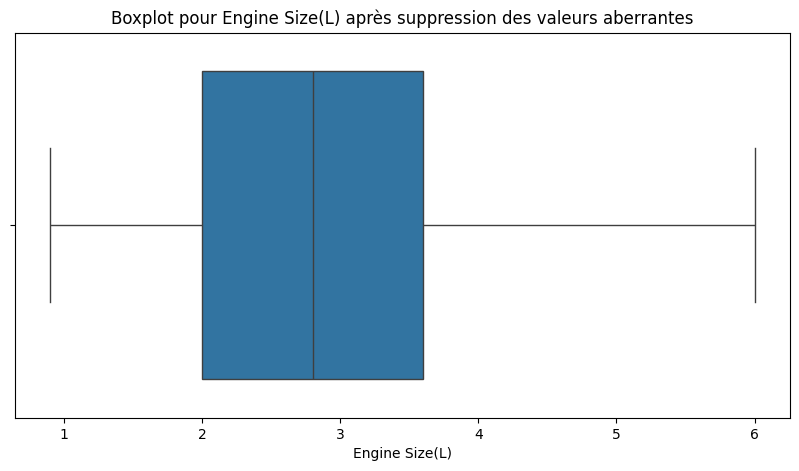

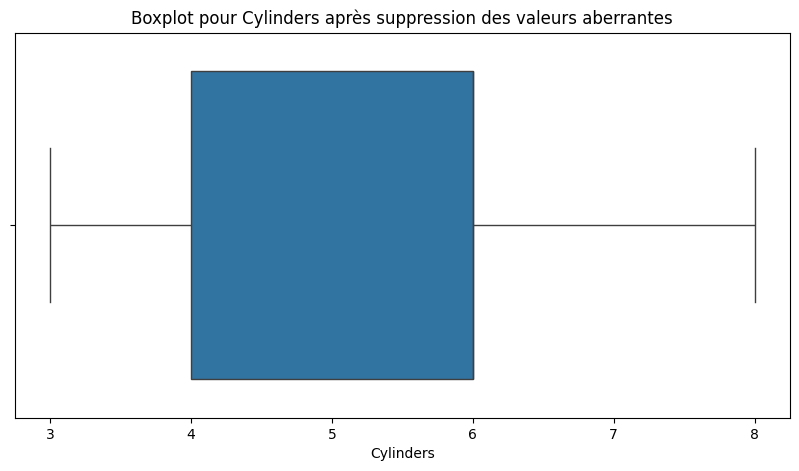

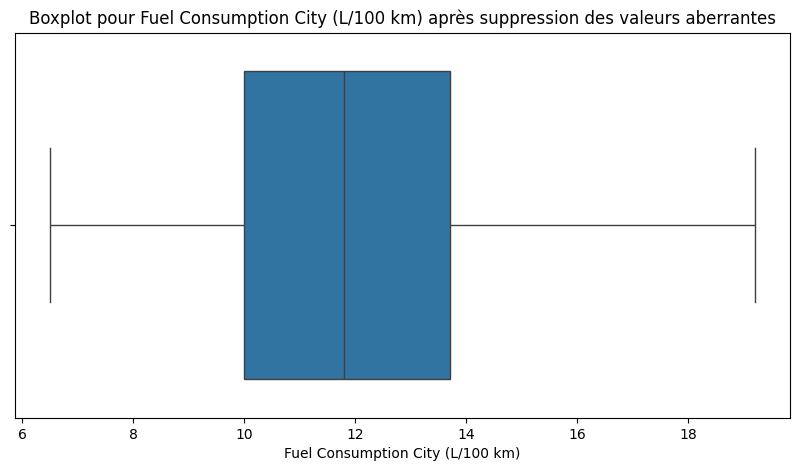

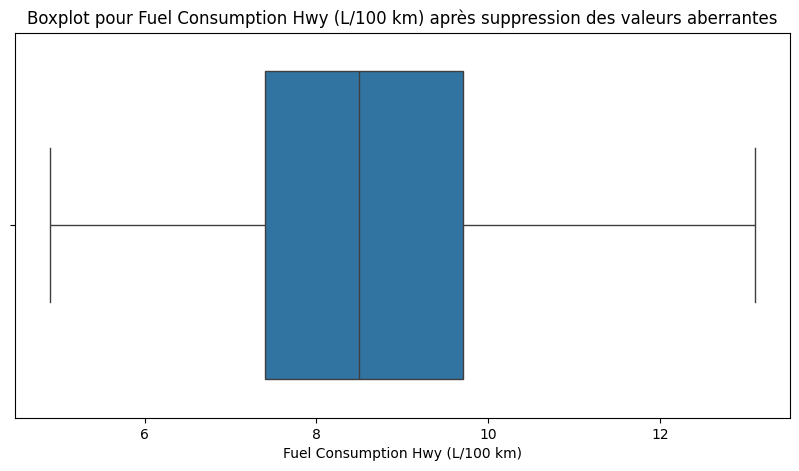

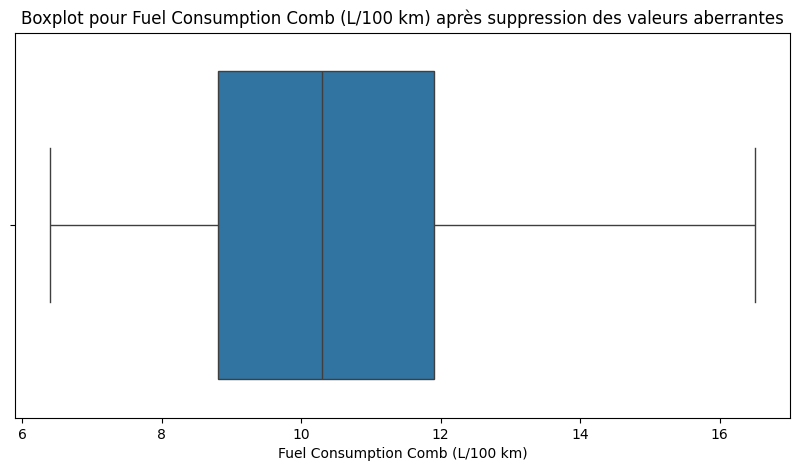

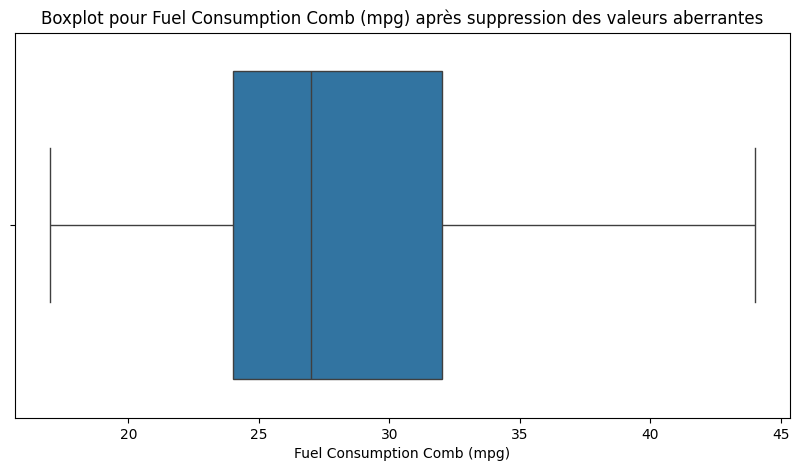

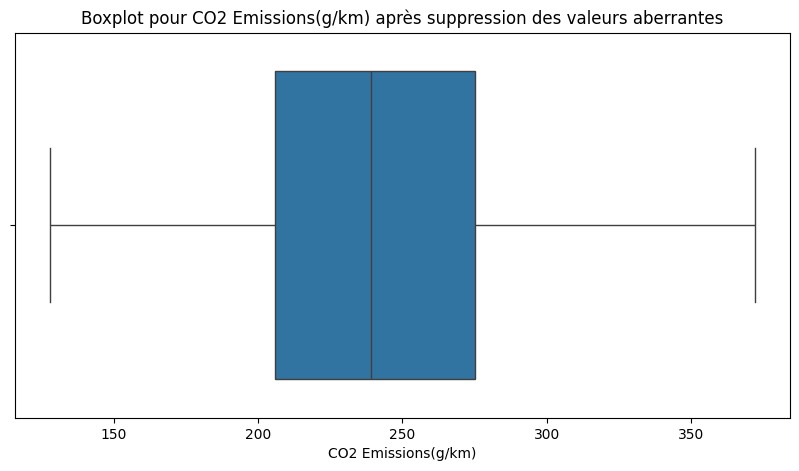

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Parcourir toutes les colonnes numériques
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x=column)
    plt.title(f"Boxplot pour {column} après suppression des valeurs aberrantes")
    plt.show()


# Analyse de corrélation entre les variables numériques 
Pour déterminer la méthode de corrélation la plus appropriée, nous vérifions si les variables suivent une loi normale. La corrélation de Pearson, qui mesure les relations linéaires, nécessite que les variables suivent une distribution normale. En revanche, Spearman et Kendall sont plus robustes aux distributions non normales. 

On vérifie la normalité des variables visuellement par des graphiques
On utilise deux graphiques: 
L'histogramme, représente la fréquence des valeurs de chacune des variables
La courbe de densité superposée, donne une estimation de la distribution. Si les points suivent une ligne droite dans le graphique, cela indique que la variable suit une loi normale.

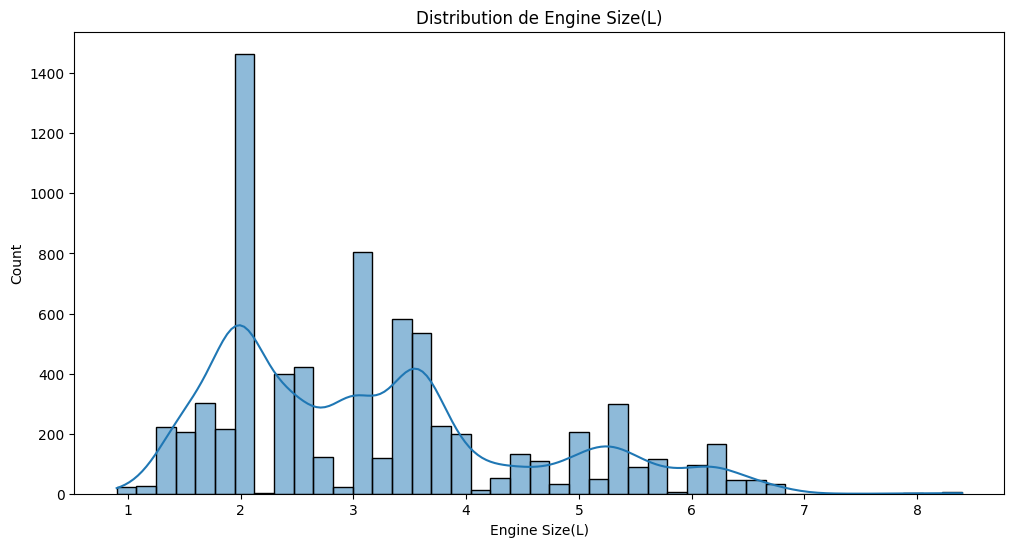

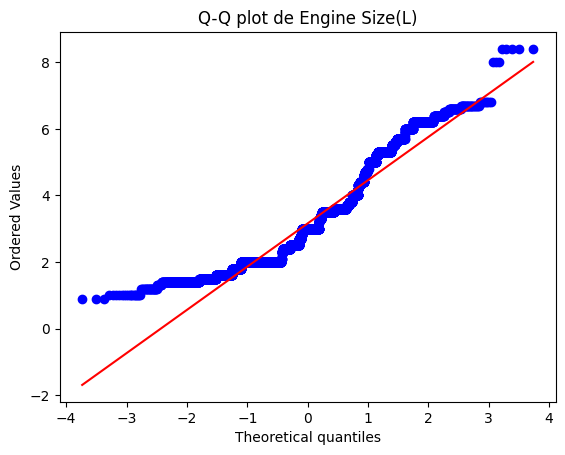

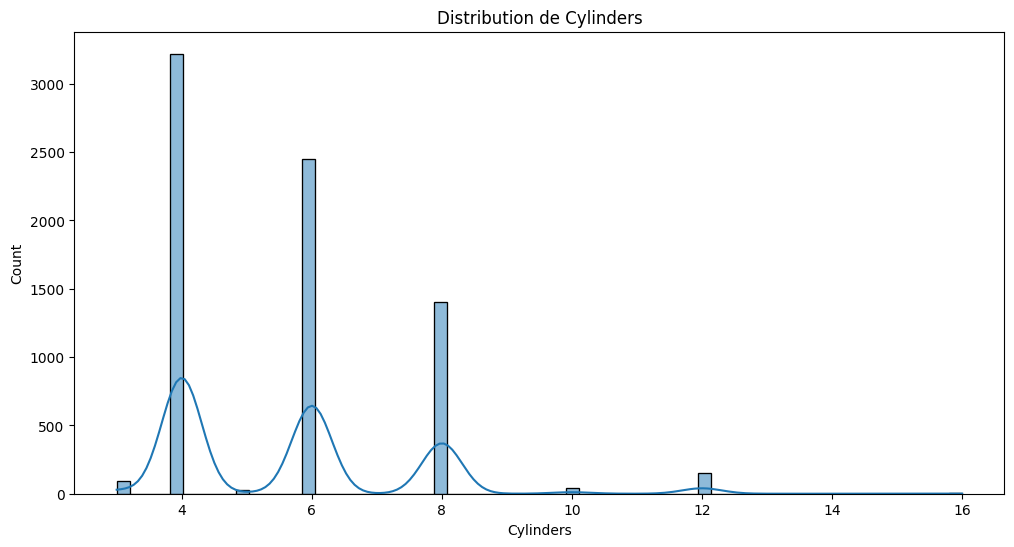

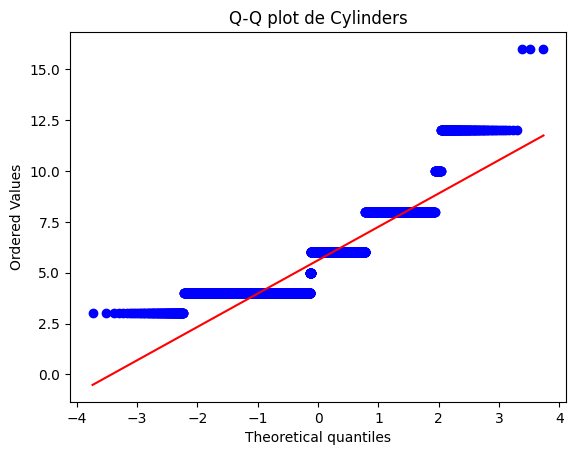

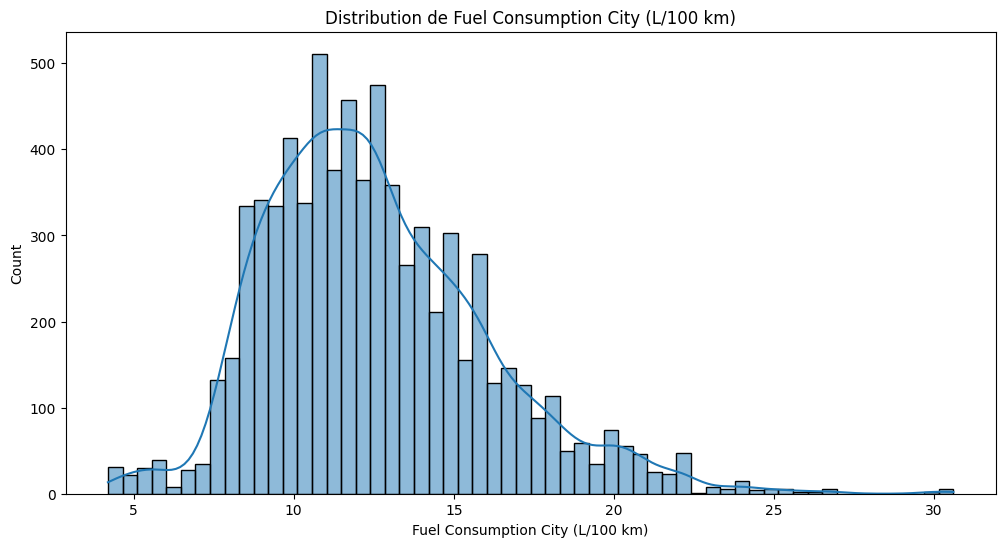

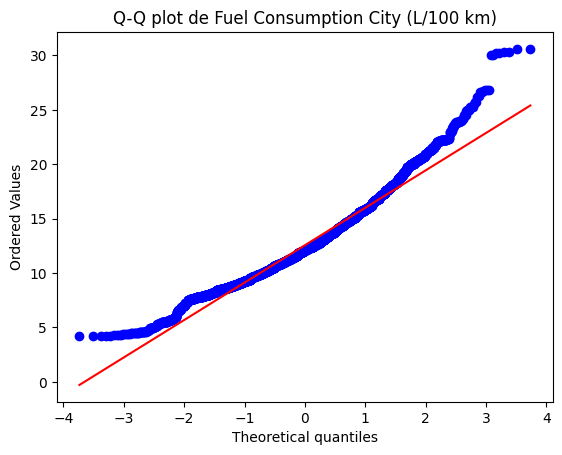

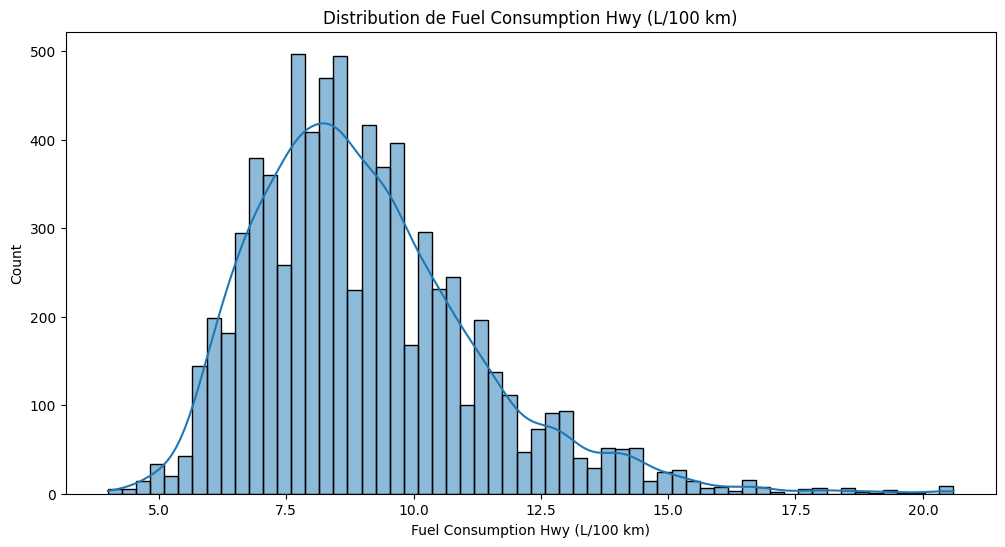

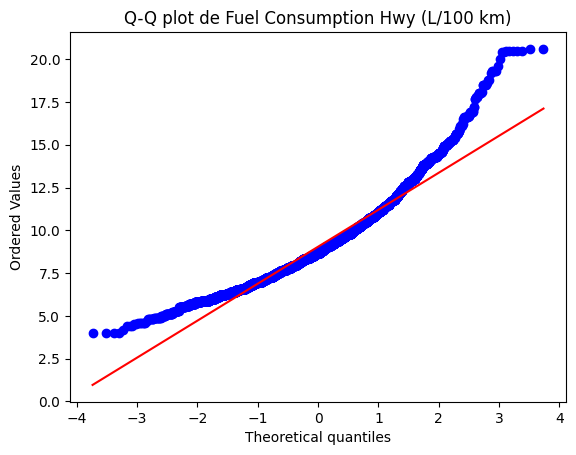

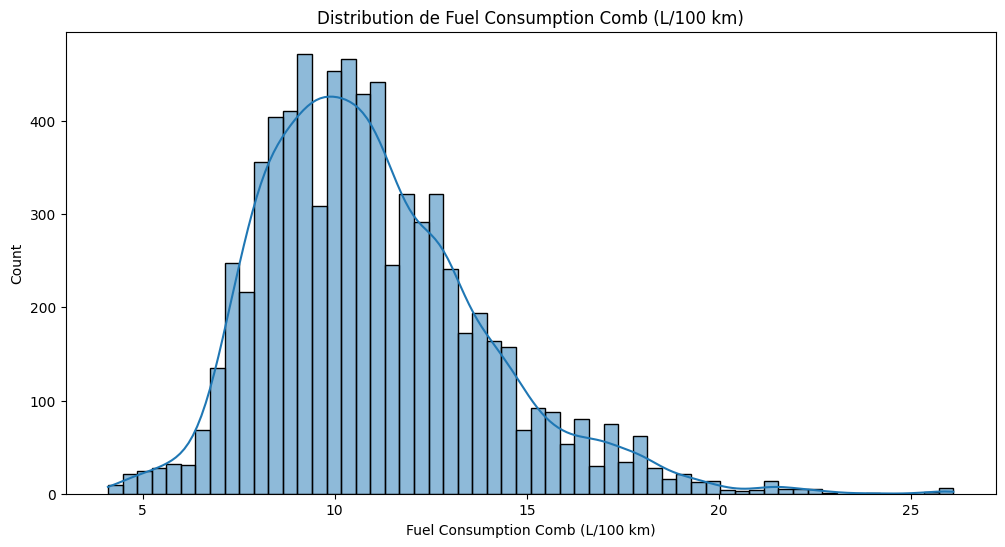

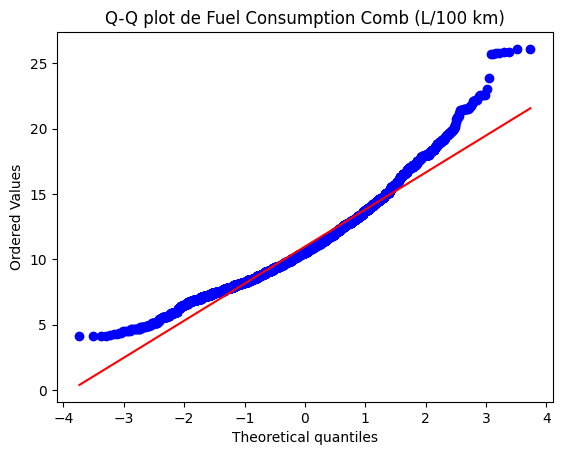

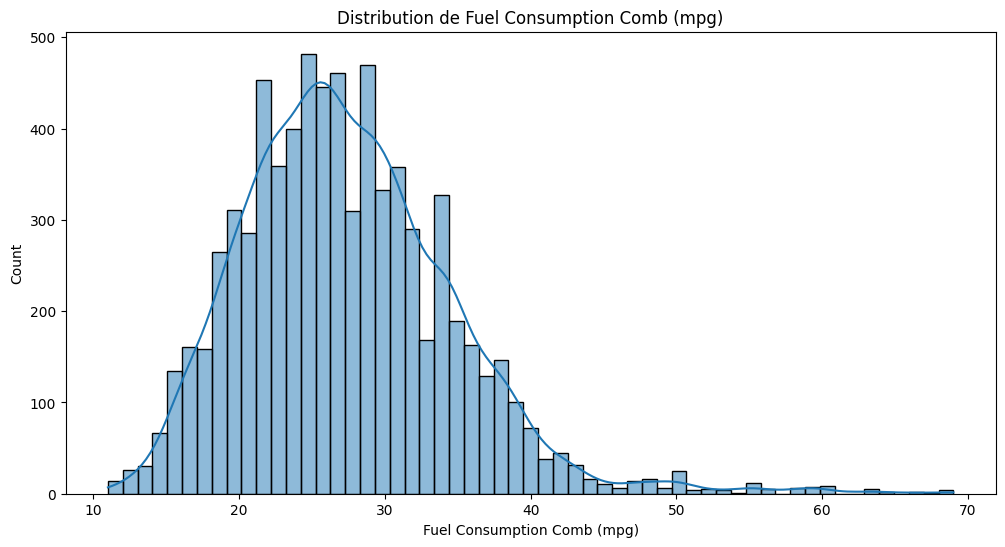

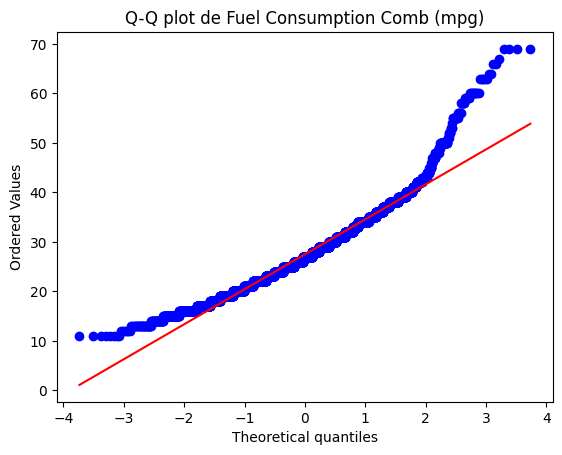

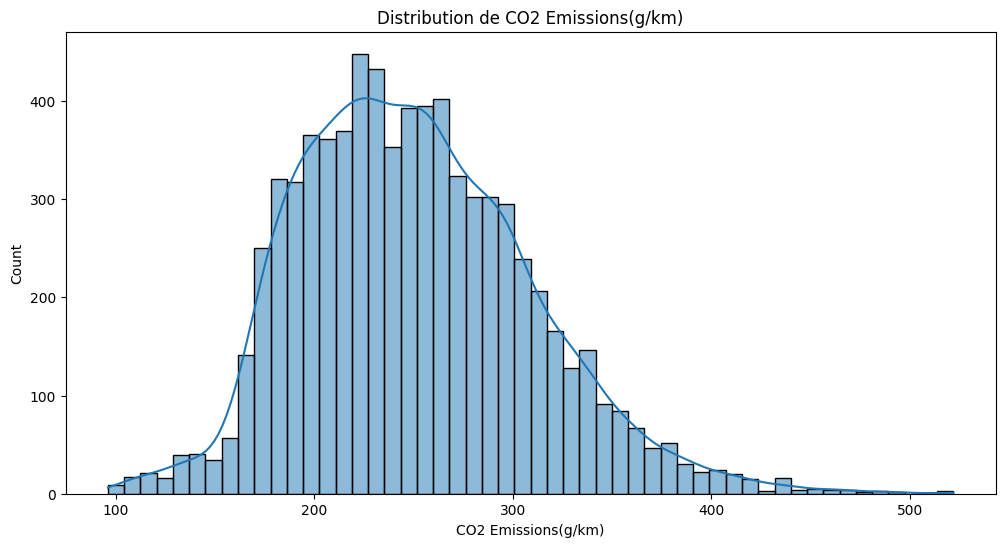

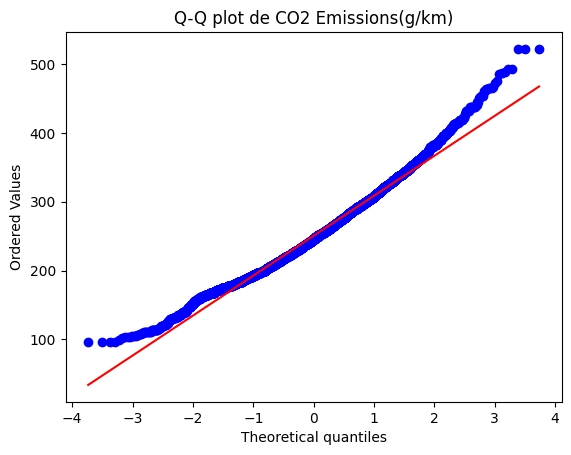

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Visualiser la distribution de chaque variable continue
variables = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 
             'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 
             'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']

for var in variables:
    plt.figure(figsize=(12, 6))

     # Histogramme avec une courbe de densité
    sns.histplot(df[var], kde=True)
    plt.title(f"Distribution de {var}")
    plt.show()
    
    # Q-Q plot pour tester la normalité
    stats.probplot(df[var].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q plot de {var}")
    plt.show()


In [14]:
for var in df.select_dtypes(include=['float64', 'int64']).columns:
    _, p_value = shapiro(df[var])
    print(f"P-valeur pour {var}:", p_value)


P-valeur pour Engine Size(L): 1.0090601043966233e-52
P-valeur pour Cylinders: 2.736471363168277e-69
P-valeur pour Fuel Consumption City (L/100 km): 3.630158471279354e-39
P-valeur pour Fuel Consumption Hwy (L/100 km): 1.794632275691568e-46
P-valeur pour Fuel Consumption Comb (L/100 km): 2.1568808477817223e-41
P-valeur pour Fuel Consumption Comb (mpg): 4.953622281262983e-43
P-valeur pour CO2 Emissions(g/km): 3.1579812974953965e-28


C:\Users\hp\AppData\Local\Temp\ipykernel_11448\525492663.py:2: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7385.
  _, p_value = shapiro(df[var])


P-valeur obtenue avec le test de Shapiro-Wilk :

Si p-valeur ≥ 0.05, on ne rejette pas l'hypothèse nulle : la variable suit une distribution normale.
Si p-valeur < 0.05, on rejette l'hypothèse nulle : la variable ne suit pas une distribution normale.

Dans ce cas : Toutes les p-valeurs sont extrêmement < 0.05, donc toutes les variables numériques du dataset ne suivent pas une loi normale.

Nous avons choisi d'utiliser la matrice de corrélation car elle permet une analyse exploratoire rapide des relations entre toutes les variables numériques du dataset. 

Comme les variables de notre dataset ne suivent pas une distribution normale, la corrélation avec Spearman et Kendall, sont plus robustes aux distributions non normales et permettent de détecter des relations monotones (croissantes ou décroissantes)

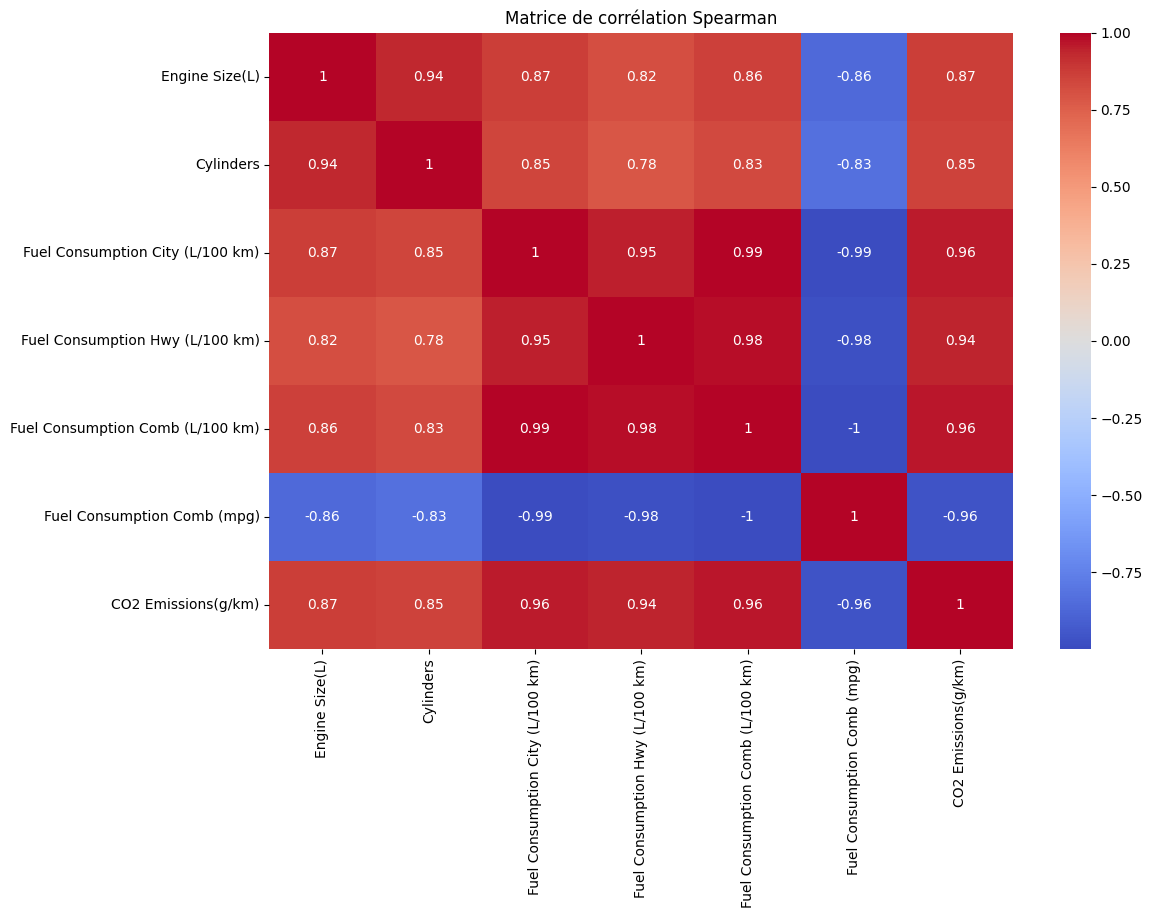

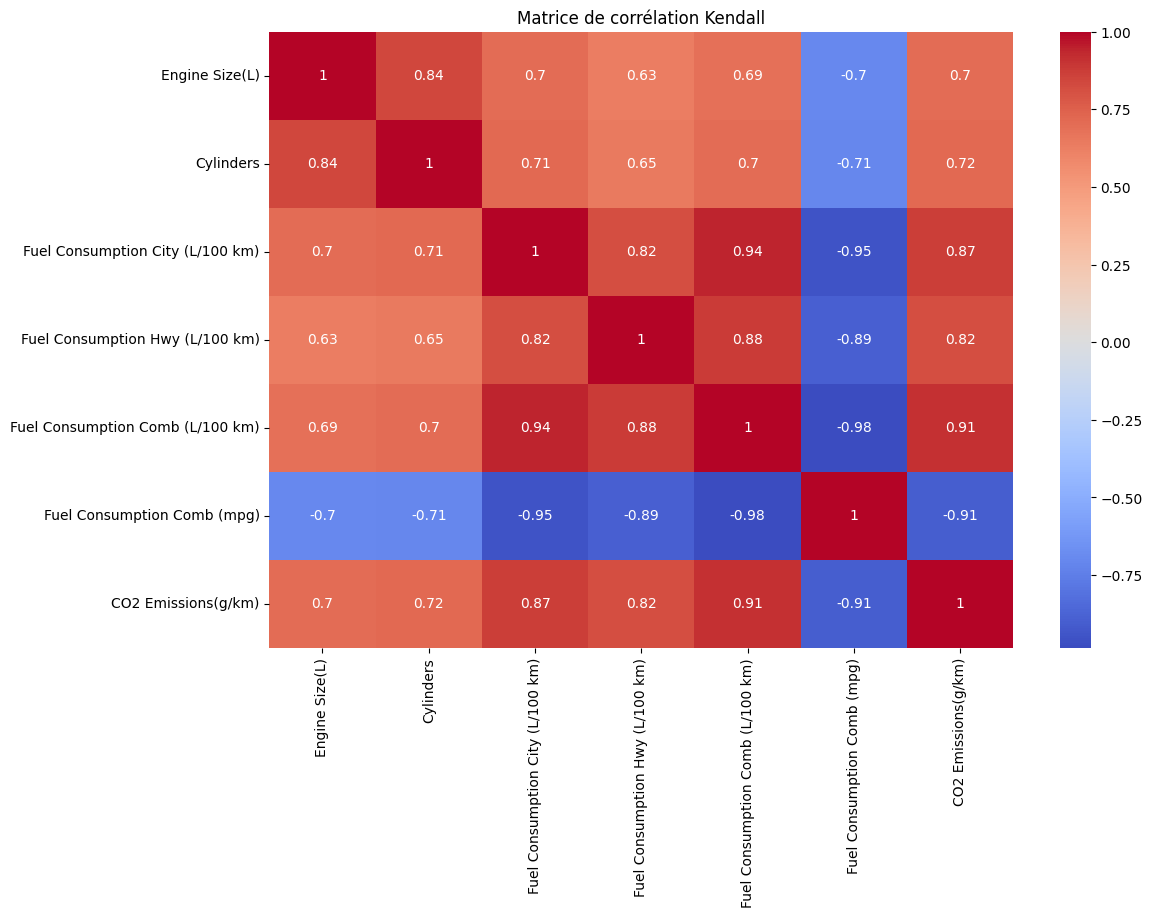

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrer uniquement les colonnes numériques
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calcul des deux matrices de corrélation
spearman_corr = numeric_df.corr(method='spearman') # Relation monotone
kendall_corr = numeric_df.corr(method='kendall')   # Relation monotone robuste

# Afficher les matrices sous forme de heatmaps
plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation Spearman")
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(kendall_corr, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation Kendall")
plt.show()


Relation entre CO2 Emissions (g/km) et les autres variables :

Fuel Consumption Comb (L/100 km) :
Très forte corrélation positive (Spearman = 0.96, Kendall = 0.91).
Cela montre que la consommation de carburant combinée est le principal facteur influençant les émissions de CO2.

Fuel Consumption City (L/100 km) et Fuel Consumption Hwy (L/100 km) :
Corrélations fortes avec CO2 Emissions, mais légèrement inférieures à la consommation combinée.

Relation avec Engine Size (L) :
CO2 Emissions (g/km) a une corrélation significative avec la taille du moteur (Spearman = 0.87, Kendall = 0.7).
Cela montre que les moteurs plus grands émettent davantage de CO2.

Relation avec Cylinders :
Corrélation forte mais légèrement inférieure (Spearman = 0.85, Kendall = 0.72).
Les moteurs avec plus de cylindres consomment plus de carburant et émettent plus de CO2.

Conclusion: 
Les variables Fuel Consumption Comb (L/100 km), Fuel Consumption City (L/100 km), et Fuel Consumption Hwy (L/100 km) sont les plus corrélées avec les émissions de CO2. Cela signifie que la consommation de carburant est le facteur principal à considérer dans la prédiction des émissions.

Les relations très fortes (entre consommation en ville, sur autoroute et combinée) peuvent indiquer une redondance des variables. Il pourrait être utile de supprimer certaines de ces variables pour éviter la multicolinéarité.

Engine Size (L) et Cylinders sont également des facteurs en corrélation avec CO2 Emissions

# Analyse des relations qualitatives - quantitatives
a. Visualisation avec des boxplots

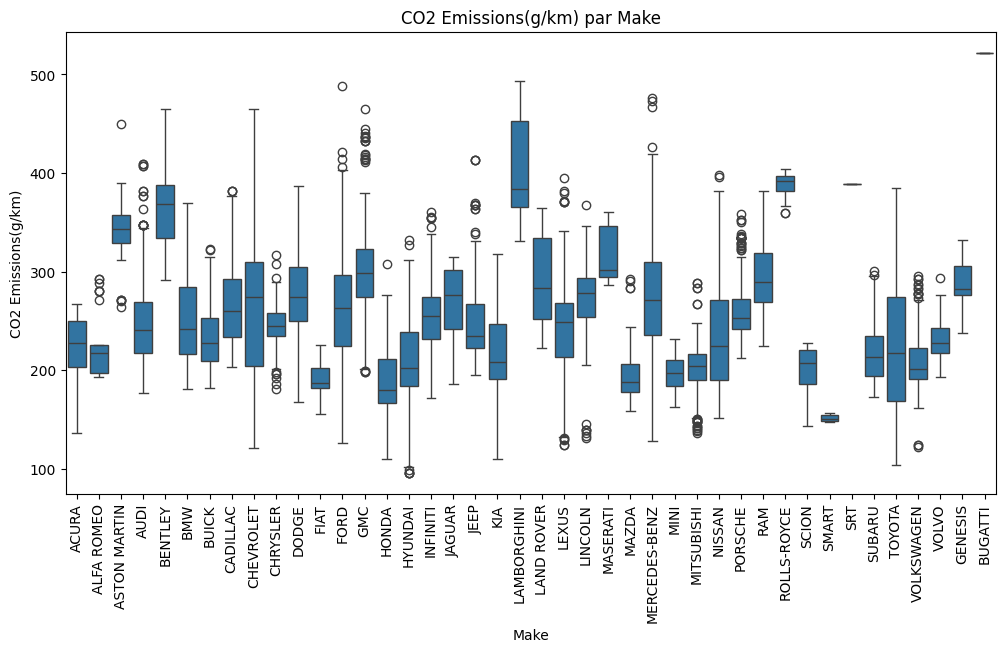

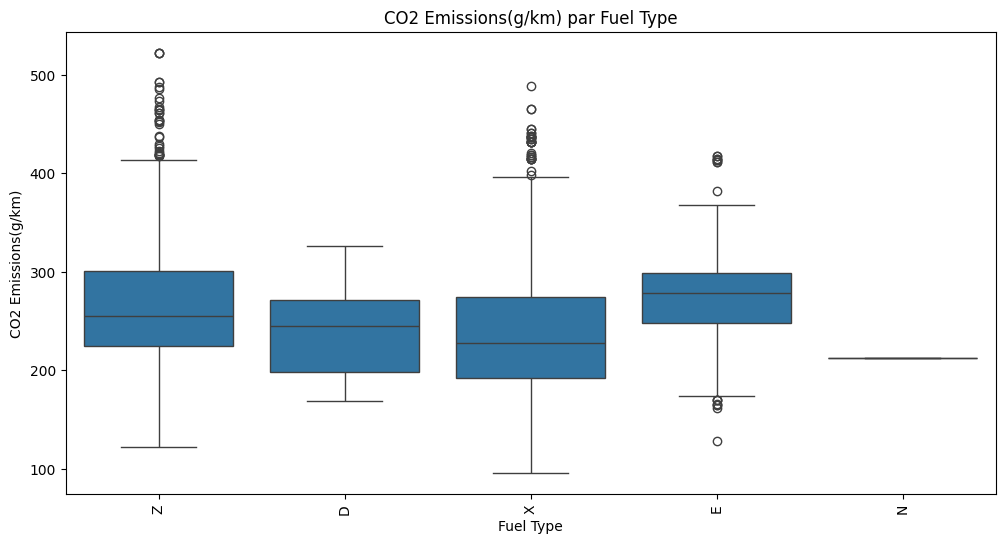

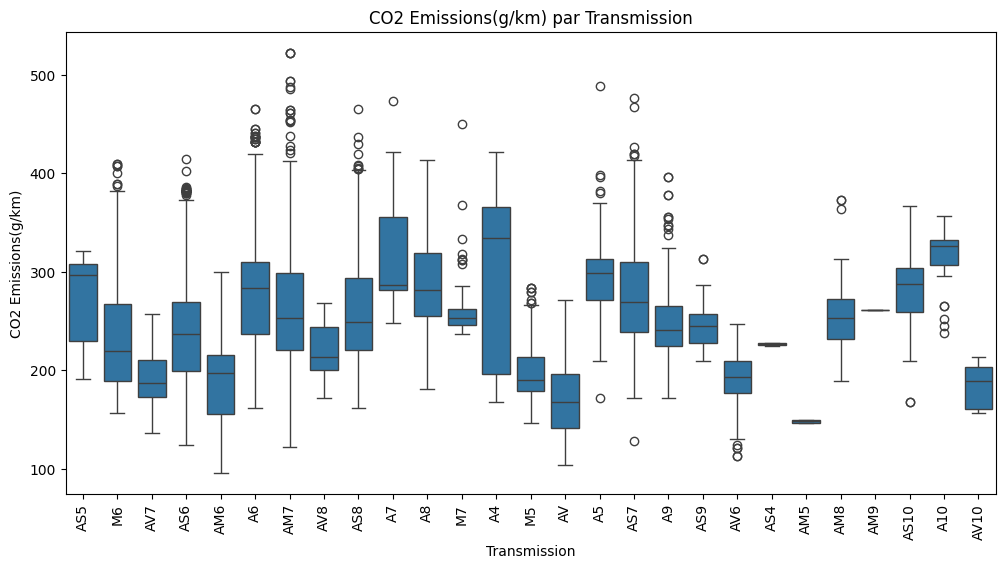

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Liste des variables qualitatives
qualitative_vars = ['Make', 'Fuel Type', 'Transmission']

# Variable quantitative à analyser
quantitative_var = 'CO2 Emissions(g/km)'

for var in qualitative_vars:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x=var, y=quantitative_var)
    plt.xticks(rotation=90)  # Rotation pour mieux voir les catégories si elles sont nombreuses
    plt.title(f"{quantitative_var} par {var}")
    plt.show()



Analyses des boxplots: 
1. Marque (Make) et CO2 Emissions : Certaines marques (par exemple, SMART) ont des émissions nettement inférieures par rapport à d'autres (ROLLS-ROYCE, BUGATTI), ce qui indique que la marque est un facteur influençant significativement les émissions.
2. Type de carburant (Fuel Type) et CO2 Emissions : On observe que les types de carburant comme diesel (D) ou gaz naturel (N) ont tendance à avoir des émissions plus faibles, tandis que les carburants comme essence (Z) ou éthanol (E) ont des émissions plus élevées.
3. Transmission (Transmission) et CO2 Emissions : Les émissions varient selon le type de transmission. Par exemple, certains types comme AM6 ou AS7 génèrent des valeurs plus élevées que d'autres (AV10).

b. Tests statistiques: Dans cette étape, nous avons choisi d'utiliser Kruskal-Wallis pour tester l'influence des variables qualitatives (Make, Fuel Type, Transmission) sur la variable quantitative CO2 Emissions(g/km).
Kruskal-Wallis ne fait aucune hypothèse sur la distribution des données. Il est donc adapté pour comparer des groupes lorsque les données ne suivent pas une loi normale
Si la p-valeur < 0,05, la variable influence significativement les émissions.

In [24]:
from scipy.stats import kruskal

# Variable quantitative
quantitative_var = 'CO2 Emissions(g/km)'

# Effectuer le test pour chaque variable qualitative
for var in qualitative_vars:
    groups = [df[df[var] == category][quantitative_var] for category in df[var].unique()]
    stat, p_value = kruskal(*groups)
    print(f"Kruskal-Wallis pour {var} et {quantitative_var}: stat = {stat}, p-value = {p_value}")

Kruskal-Wallis pour Make et CO2 Emissions(g/km): stat = 2666.3371227821717, p-value = 0.0
Kruskal-Wallis pour Fuel Type et CO2 Emissions(g/km): stat = 561.6598061917771, p-value = 3.0697980320756514e-120
Kruskal-Wallis pour Transmission et CO2 Emissions(g/km): stat = 2127.40984940723, p-value = 0.0


Pour chacune des variables qualitatives, les résultats montrent une p-valeur extrêmement faible (p < 0,05), ce qui indique que :
La marque (Make) a une influence significative sur les émissions de CO2.
Le type de carburant (Fuel Type) est également un facteur influençant.
La transmission (Transmission) a un effet significatif sur les émissions.
Ces résultats confirment que ces variables qualitatives doivent être prises en compte dans l'analyse des facteurs influençant les émissions de CO2.

# Relations qualitatives - qualitatives
Le test du Chi² est spécifiquement conçu pour les variables qualitatives. Il permet de quantifier l'intensité de la relation entre les catégories des deux variables qualitatives grâce à la statistique de Chi².

In [25]:
from scipy.stats import chi2_contingency

# Liste des variables qualitatives
qualitative_vars = ['Make', 'Fuel Type', 'Transmission']

# Tester toutes les paires de variables qualitatives
for i in range(len(qualitative_vars)):
    for j in range(i + 1, len(qualitative_vars)):
        var1 = qualitative_vars[i]
        var2 = qualitative_vars[j]
        
        # Créer une table de contingence
        contingency_table = pd.crosstab(df[var1], df[var2])
        
        # Test du Chi²
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Chi² entre {var1} et {var2}: Chi² = {chi2}, p-value = {p}")


Chi² entre Make et Fuel Type: Chi² = 6076.087970237664, p-value = 0.0
Chi² entre Make et Transmission: Chi² = 34479.472804355726, p-value = 0.0
Chi² entre Fuel Type et Transmission: Chi² = 3788.9677680148966, p-value = 0.0


Les résultats montrent que pour toutes les combinaisons de variables qualitatives :

Make et Fuel Type :
La valeur de Chi² est très élevée (6076.09) avec une p-valeur = 0, ce qui indique une relation significative entre la marque du véhicule et le type de carburant utilisé.

Make et Transmission :
Une valeur de Chi² encore plus élevée (34479.47) avec une p-valeur = 0 montre une association forte entre la marque et le type de transmission.

Fuel Type et Transmission :
La valeur de Chi² (3788.97) et la p-valeur = 0 confirment également une relation significative entre le type de carburant et la transmission.

### Interprétation
Les résultats indiquent que ces variables qualitatives ne sont pas indépendantes les unes des autres. Par exemple :
* Les marques de véhicules semblent préférer des combinaisons spécifiques de carburant et de transmission.
* Les choix de transmission et de carburant sont également liés.

Validation des hypothèses
Nous utilisons des tests statistiques et des visualisations pour confirmer ou rejeter nos hypothèses précédentes.
Hypothèse 1 : La taille du moteur est positivement corrélée avec les émissions de CO2.